## Чтение данных

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('content/dataset_1_lesson.csv')

In [3]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
for col in df.columns:
    isnull_count = df[col].isnull().sum()
    if isnull_count:
       print(f"Столбец '{col}': нулевых значений {isnull_count}")

Столбец 'LotFrontage': нулевых значений 259
Столбец 'Alley': нулевых значений 1369
Столбец 'MasVnrType': нулевых значений 872
Столбец 'MasVnrArea': нулевых значений 8
Столбец 'BsmtQual': нулевых значений 37
Столбец 'BsmtCond': нулевых значений 37
Столбец 'BsmtExposure': нулевых значений 38
Столбец 'BsmtFinType1': нулевых значений 37
Столбец 'BsmtFinType2': нулевых значений 38
Столбец 'Electrical': нулевых значений 1
Столбец 'FireplaceQu': нулевых значений 690
Столбец 'GarageType': нулевых значений 81
Столбец 'GarageYrBlt': нулевых значений 81
Столбец 'GarageFinish': нулевых значений 81
Столбец 'GarageQual': нулевых значений 81
Столбец 'GarageCond': нулевых значений 81
Столбец 'PoolQC': нулевых значений 1453
Столбец 'Fence': нулевых значений 1179
Столбец 'MiscFeature': нулевых значений 1406


## Пройдемcя по нулевым значеняим:
- LotFrontage - Линейные футы улицы, примыкающей к участку - дом может не примыкать к улице. Проверяем эту гипотезу ниже сравнивая с данными LotConfig
- Alley - Проезд через участок. Нулевое поле просто обозначает что проезда нет.
- MasVnrType - тип каменной кладки. Ее может не быть, поэтому нулевые значения оправданы.
- MasVnrArea - площадь каменной кладки. Если кладки нет, то и площади нет. (ниже проверяем нет ли исключений что кладка есть, а площадь нулевая)
- BsmtQual,BsmtCond, BsmtExposure, BsmtExposure, BsmtFinType1,BsmtFinType2   данные подвала. Нет подвала нет и этих данных(ниже проверяем нет ли исключений т.е отсутствует что-то одно из данных (они или есть оба или обоих нет)
- FireplaceQu - качество камина. Нет камина нет качества. ниже проеряем коректность связи камина и качества
- Electrical - электрика. Возможно дом без электричества.
- GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond - данные по граражу. Нет гаража нет данных
- PoolQC - качество бассейна. Нет бассейна нет качества (ниже проверяем соответвие бассейнов)
- Fence - наличие забора (его может и не быть)
- MiscFeature - остальные данные (может и не быть)

## Вывод пропущенных данные - нет (LotConfig под вопросом).

In [7]:
# смотрим что у нас етсь в LotConfig
df['LotConfig'].unique()


array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [8]:
# Ищем пропуски/отсуцтвие значений
df.groupby('LotConfig')['LotFrontage'].apply(lambda x: x.isnull().sum())


LotConfig
Corner      62
CulDSac     49
FR2         14
FR3          0
Inside     134
Name: LotFrontage, dtype: int64

- Corner: 62 . Это угловые участки. Отсуствие границы с улицей вполне может быть.
- CulDSac: 49 Это тупики, поэтому аналогично.
- FR2: 14 Примыкание с 2 сторон. Тут не знаю.... спорно, но навреное допустимо.
- FR3: 0
- Inside: 134 Внутренние участки. Скорее всего тут как раз пропуски - пропущенные данные. Стоит рассмотреть необходимость заполнение их данными (например медианными)


In [9]:
# Заполнение медианными данными (пока закоменчено)

# df['LotFrontage'] = df.groupby('LotConfig')['LotFrontage'].transform(
#     lambda x: x.fillna(x.median())
# )

## проверка связей в данных (например качество бассейна не может быть при отсутсвии бассейна и т.д.)

In [10]:
mismatch = df[(df['PoolArea'] == 0) & (df['PoolQC'].notnull())]

if not mismatch.empty:
    print("Связь между 'PoolArea' и 'PoolQC' не корректна.")
    print(mismatch)
else:
    print("Связь между 'PoolArea' и 'PoolQC' корректна.")

Связь между 'PoolArea' и 'PoolQC' корректна.


In [11]:
mismatch = df[(df['GarageType'] == 0) & (df['GarageYrBlt'].notnull()) & (df['GarageFinish'].notnull()) & (df['GarageCars'].notnull()) & (df['GarageArea'].notnull()) & (df['GarageQual'].notnull()) & (df['GarageCond'].notnull())]

if not mismatch.empty:
    print("Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' не корректна.")
    print(mismatch)
else:
    print("Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' корректна.")

Связь между 'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond' корректна.


In [12]:
mismatch = df[(df['Fireplaces'] == 0) & (df['FireplaceQu'].notnull())]

if not mismatch.empty:
    print("Связь между 'Fireplaces' и 'FireplaceQu' не корректна.")
    print(mismatch)
else:
    print("Связь между 'Fireplaces' и 'FireplaceQu' корректна.")

Связь между 'Fireplaces' и 'FireplaceQu' корректна.


In [13]:
# проверяем есть ли исключения по подвалу)
mismatch = df[(df['BsmtQual'] == 0) & (df['BsmtCond'].notnull()) & (df['BsmtExposure'].notnull()) & (df['BsmtFinType1'].notnull()) & (df['BsmtFinType2'].notnull())]

if not mismatch.empty:
    print("Связь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' не корректна.")
    print(mismatch)
else:
    print("Связь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' корректна.")
    


Связь между 'BsmtQual' и 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2' корректна.


In [14]:
# проверяем есть ли пропущенные данные в каменнйо кладке и ее площади 
#(т.е проверка если кладка есть,а  площадь 0)
for index, row in df.iterrows():
    if row['MasVnrArea'] == '0'  and row['MasVnrType'] != 'None':
        print(f"Пропущены данные MasVnrArea = {row['MasVnrArea']}, MasVnrType = {row['MasVnrType']} т.к кладка есть, а площади нет")
   

In [15]:
for col in df.columns:
    unique_count = df[col].nunique()  # Получаем кол-вл уникальных значение для каждого столбца
    uniq_data = df[col].unique()  # Получаем массив уникальных значений для каждого столбца
    
    # Проверяем, все ли значения можно преобразовать в числа (чтобы отсеять поля типа id и вообще числа)
    is_numeric = pd.to_numeric(df[col], errors='coerce').notnull().all()
    
    if is_numeric:
        print(f"Столбец '{col}': уникальных значений {unique_count} - цифровые значения")
    else:
        print(f"Столбец '{col}': уникальных значений {unique_count} - {list(uniq_data[:5])}")

        

Столбец 'Id': уникальных значений 1460 - цифровые значения
Столбец 'MSSubClass': уникальных значений 15 - цифровые значения
Столбец 'MSZoning': уникальных значений 5 - ['RL', 'RM', 'C (all)', 'FV', 'RH']
Столбец 'LotFrontage': уникальных значений 110 - [65.0, 80.0, 68.0, 60.0, 84.0]
Столбец 'LotArea': уникальных значений 1073 - цифровые значения
Столбец 'Street': уникальных значений 2 - ['Pave', 'Grvl']
Столбец 'Alley': уникальных значений 2 - [nan, 'Grvl', 'Pave']
Столбец 'LotShape': уникальных значений 4 - ['Reg', 'IR1', 'IR2', 'IR3']
Столбец 'LandContour': уникальных значений 4 - ['Lvl', 'Bnk', 'Low', 'HLS']
Столбец 'Utilities': уникальных значений 2 - ['AllPub', 'NoSeWa']
Столбец 'LotConfig': уникальных значений 5 - ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
Столбец 'LandSlope': уникальных значений 3 - ['Gtl', 'Mod', 'Sev']
Столбец 'Neighborhood': уникальных значений 25 - ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel']
Столбец 'Condition1': уникальных значений 9 - ['Norm

* Столбцов с не уникальными данными нет.*

In [16]:
## Вычисляем основные статистические показатели для числовых столбцов 

In [17]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*Данные имеют перекос т.к mean (среднее) = 180921, а 50% (медиана) = 163000. Поэтому можно попробовать проверить перекос* 

## Проверяем данные по цене на перекос

In [19]:
from scipy.stats import skew
import numpy as np
skew(df['SalePrice'])


1.880940746034036

*Перекос существенно выше 1, поэтому перекос значителен. И веротяно стоит применить дгарифимеческое преобразование. Но в начале построим гистрограмму для проверки*

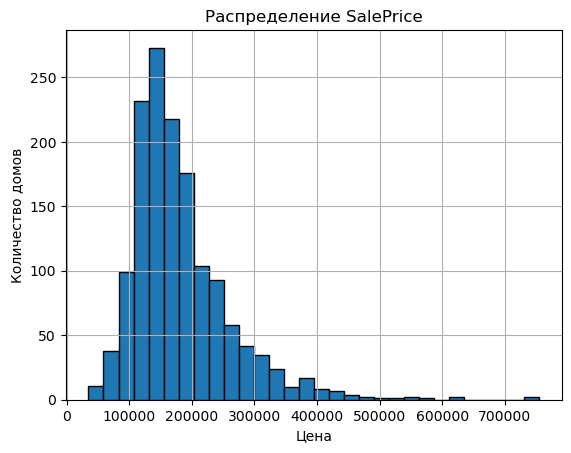

In [20]:
# построим гистограмму по сырым данным

import matplotlib.pyplot as plt

df['SalePrice'].hist(bins=30, edgecolor='black')
plt.title('Распределение SalePrice')
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.show() 

*Визуально перекос так же виден поэтому применяем преобразование*

In [21]:
df['LogSalePrice'] = np.log(df['SalePrice'])
skew(df['LogSalePrice'])


0.1212103673013655

*Перекос существенно ниже 1*

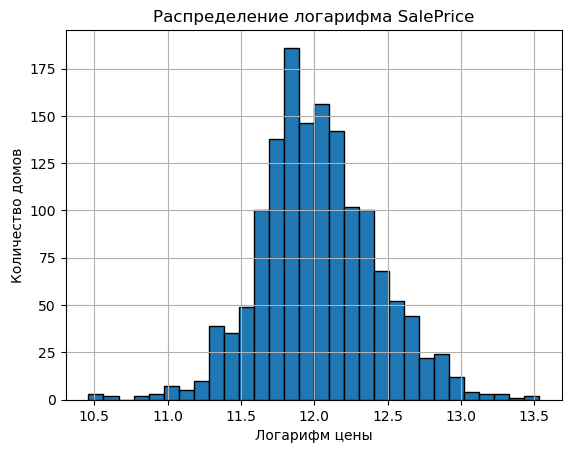

In [22]:
# построим гистограмму по преобразованны данным

df['LogSalePrice'].hist(bins=30, edgecolor='black')
plt.title('Распределение логарифма SalePrice')
plt.xlabel('Логарифм цены')
plt.ylabel('Количество домов')
plt.show() 

*Перекос существенно ниже 1*

## Построим остльные графики зависимости по отдельным столбцам

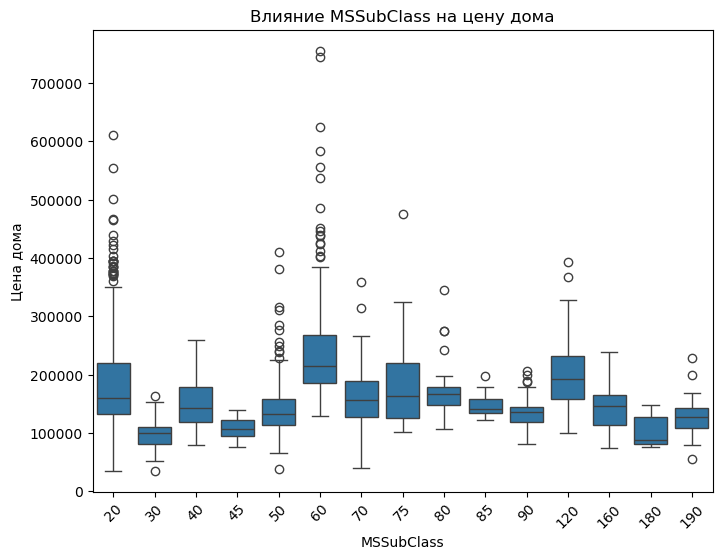

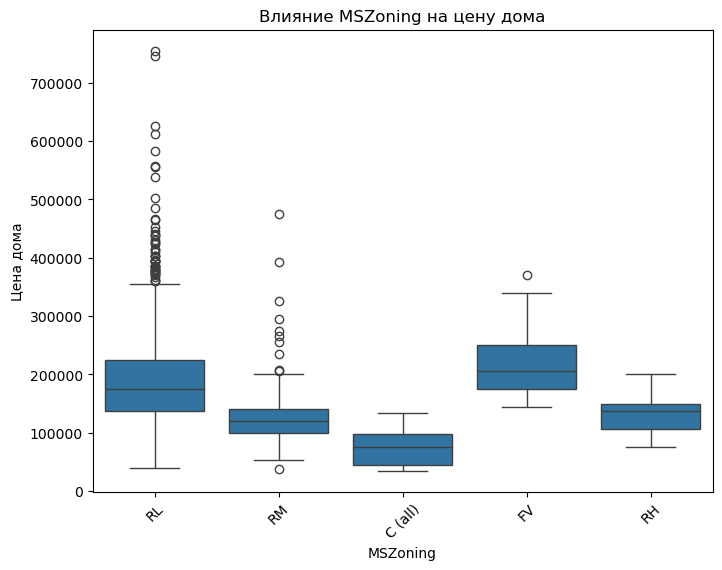

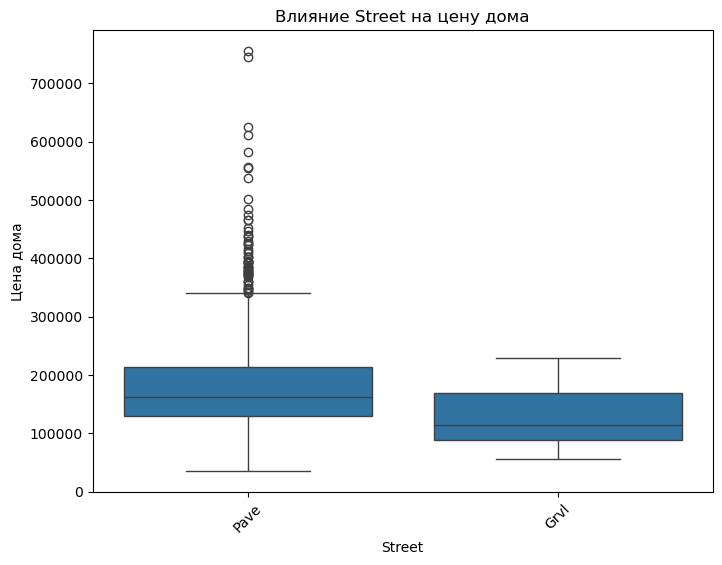

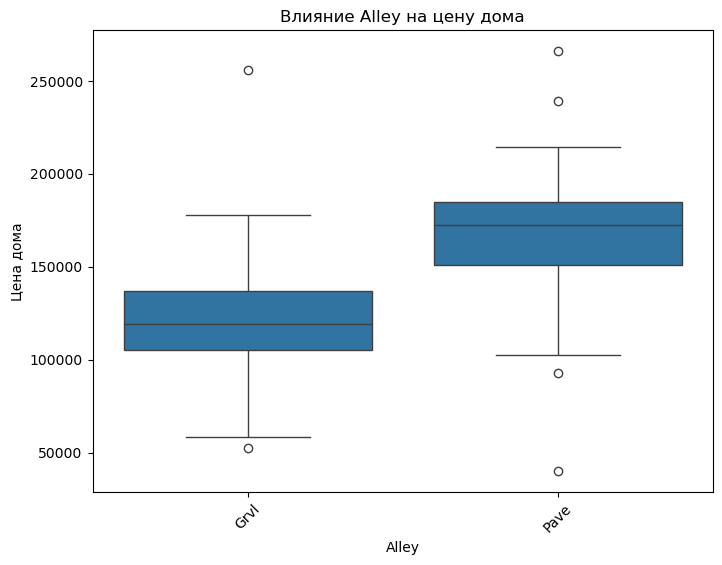

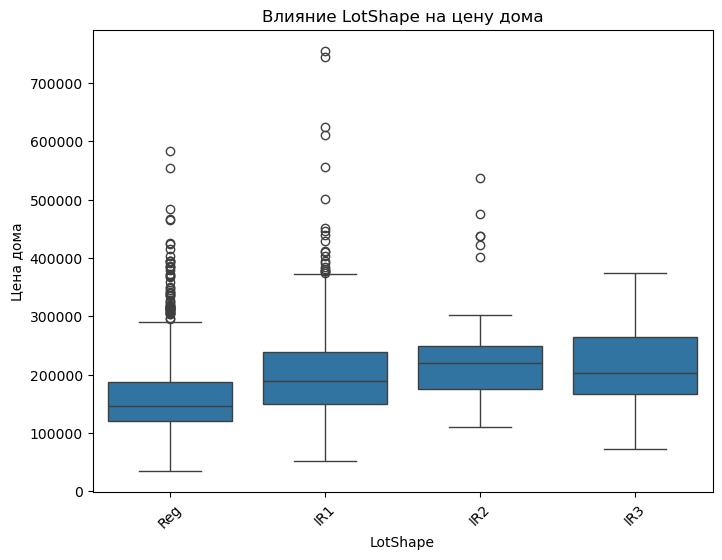

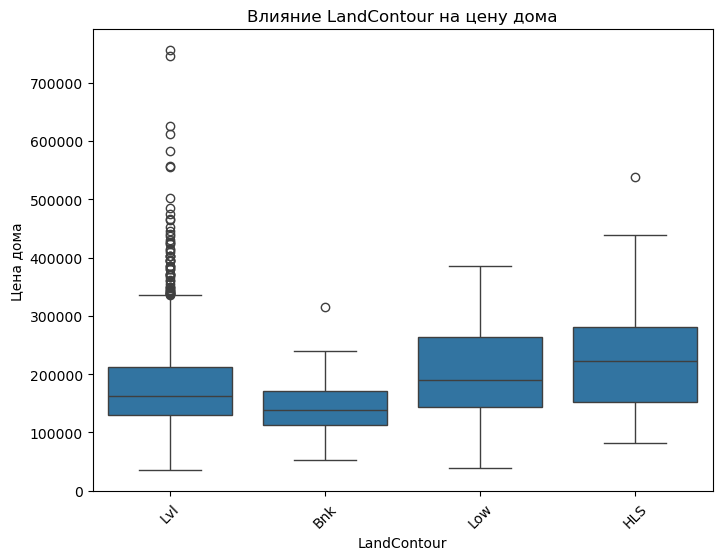

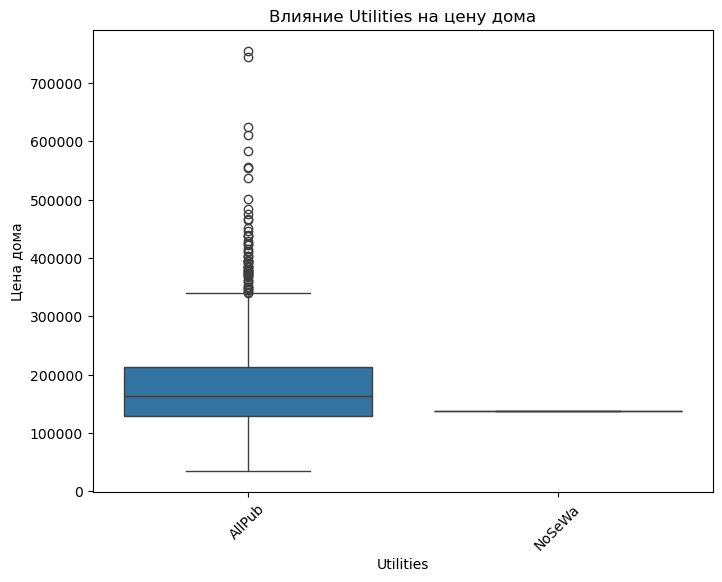

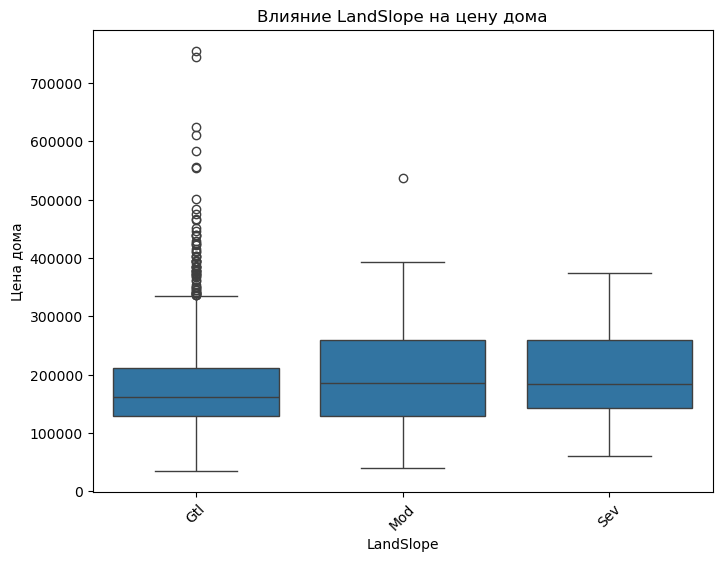

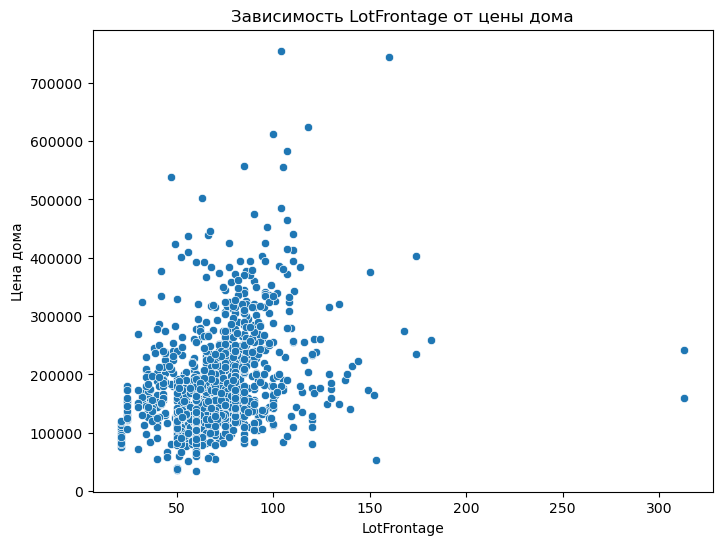

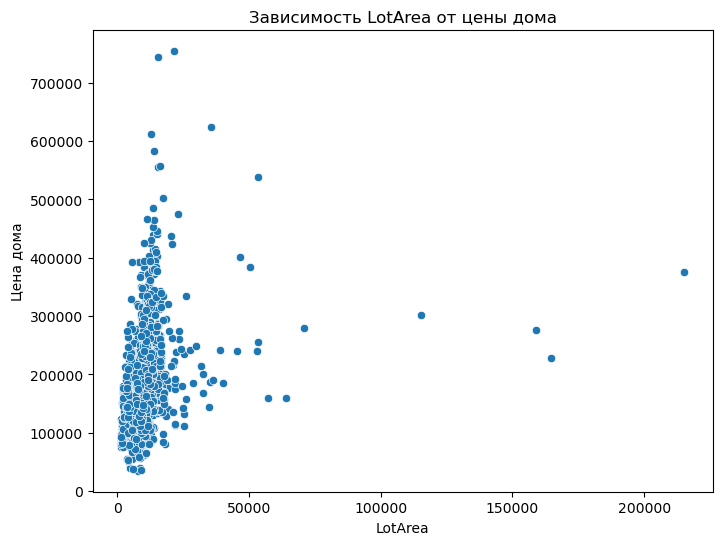

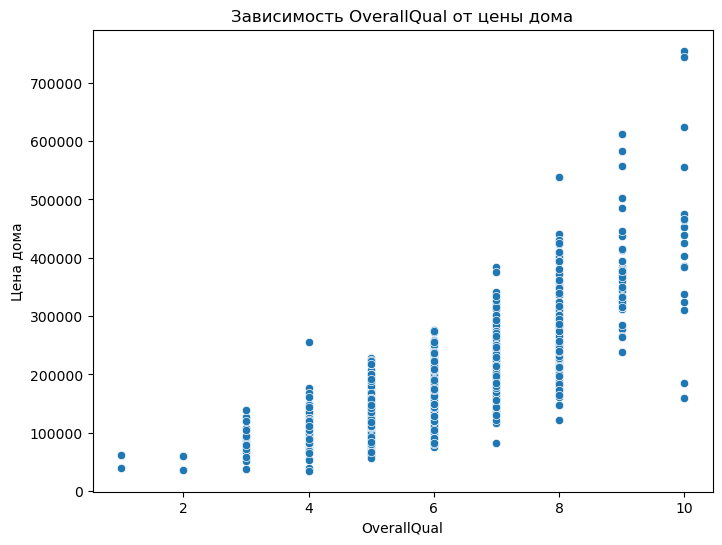

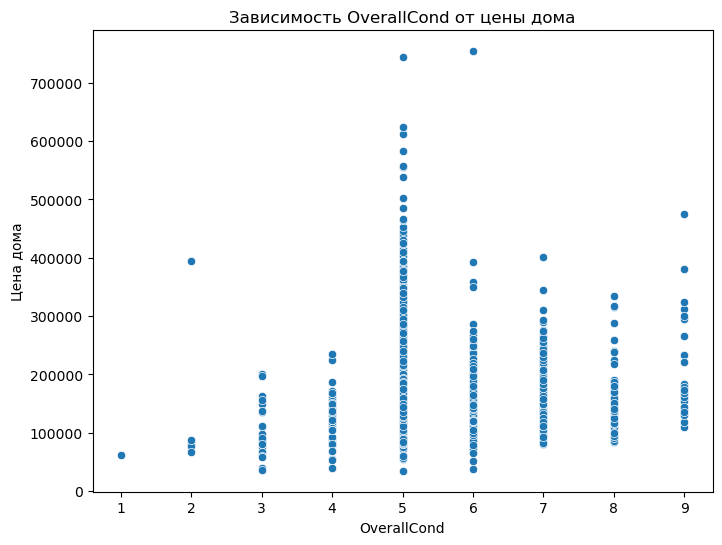

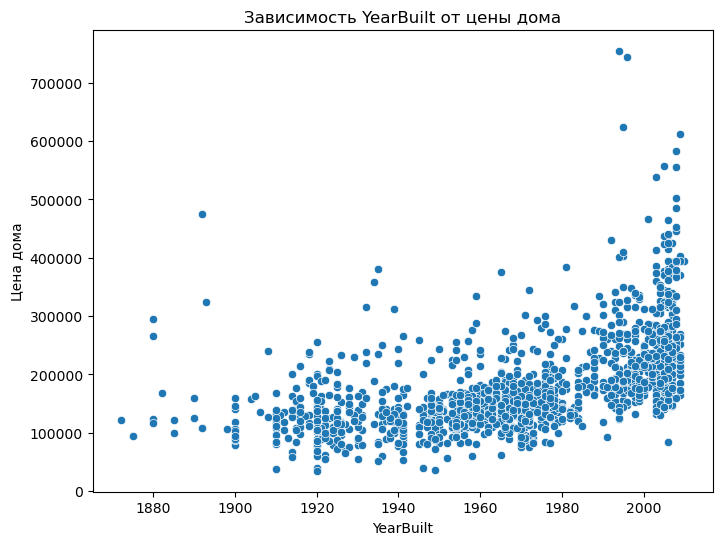

In [23]:
import seaborn as sns


# График для строчных данных
cat_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope']
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'Влияние {col} на цену дома')
    plt.xticks(rotation=45)
    plt.ylabel('Цена дома')
    plt.show()

# График для числовых данных
num_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
for col in num_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'Зависимость {col} от цены дома')
    plt.xlabel(col)
    plt.ylabel('Цена дома')
    plt.show()

## Попробуем вычленить мусор/выбросыы из данныех
*Вначале пройдемся по строчным данным. Для этого создаим функцию для отбора мусора*

In [30]:
# Функция для обработки редких категорий
def handle_rare_categories(df, cat_columns, threshold):
    """categorical_columns - список столбцов для фильтрации, threshold - критерий фильтрации.
    (если данные в категории менее этого числа, мы их переносим в отдельно созданную категорию)"""
    for col in cat_columns:
        value = df[col].value_counts()  # считаем количество данных в каждой категории
        print(f"Количествo уникальных значений для {col}:")
        print(value)
        rare_categories = value[value < threshold].index  # выбираем редкие категории
        print(f"Редкие категории для {col}: {rare_categories}")
        df[col] = df[col].replace(rare_categories, 'Other')  # заменяем их на 'Other'
    return df


*Пробуем применить функцию к нашим столбцам*

In [32]:
df = handle_rare_categories(df, ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope'], 15)




Количествo уникальных значений для MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Редкие категории для MSZoning: Index(['C (all)'], dtype='object', name='MSZoning')
Количествo уникальных значений для Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Редкие категории для Street: Index(['Grvl'], dtype='object', name='Street')
Количествo уникальных значений для Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Редкие категории для Alley: Index([], dtype='object', name='Alley')
Количествo уникальных значений для LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
Редкие категории для LotShape: Index(['IR3'], dtype='object', name='LotShape')
Количествo уникальных значений для LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Редкие категории для LandContour: Index([], dtype='object', name='LandContour'

array(['RL', 'RM', 'Other', 'FV', 'RH'], dtype=object)

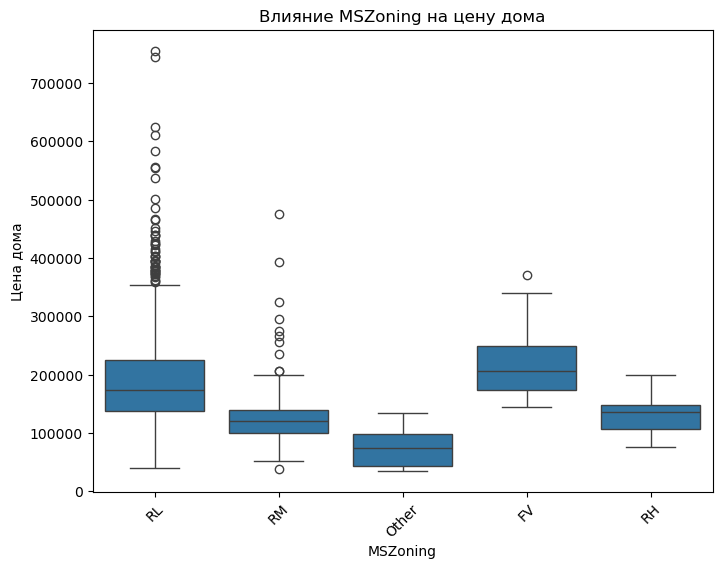

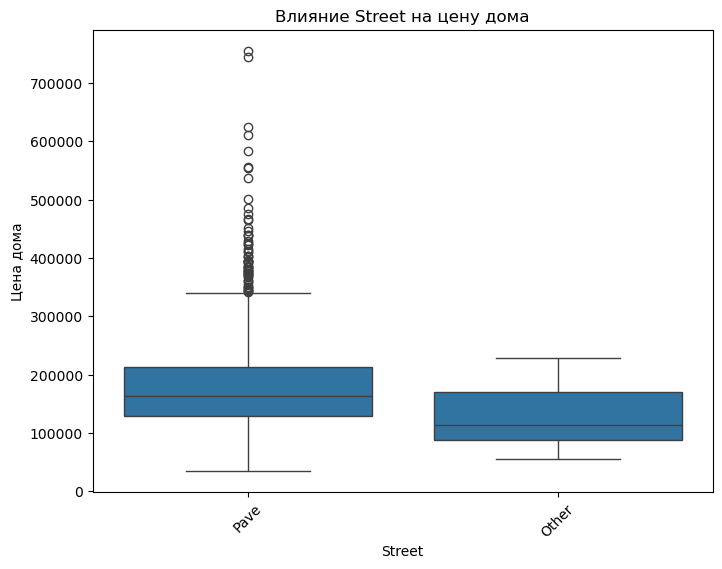

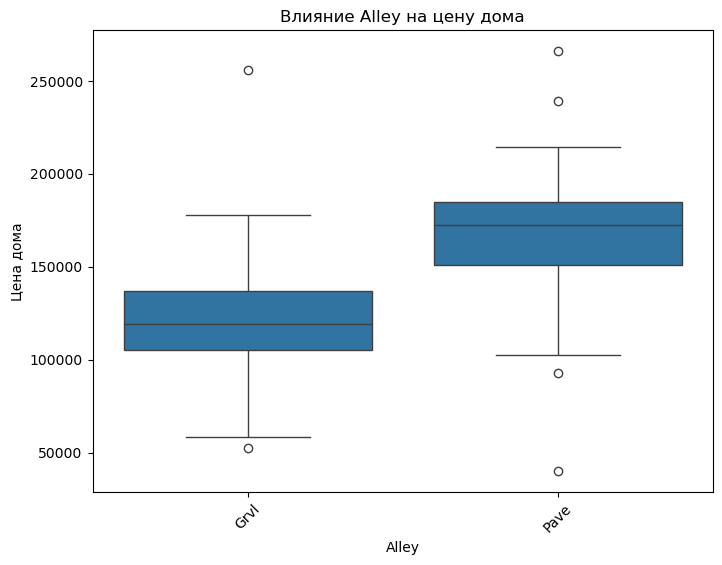

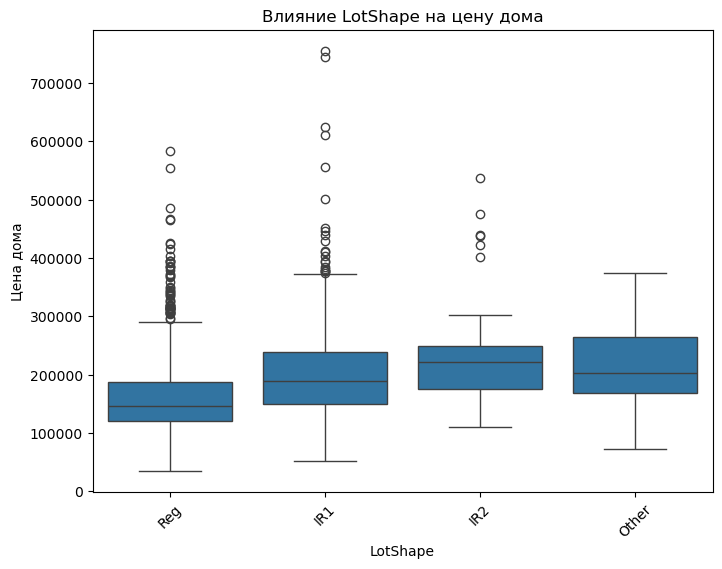

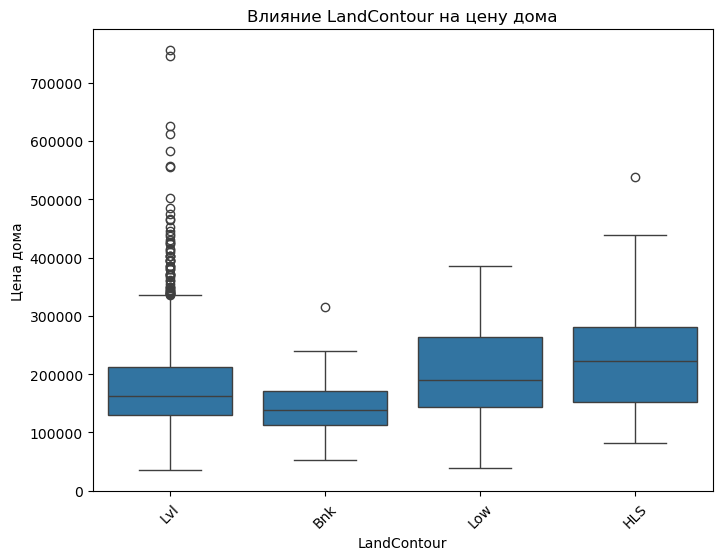

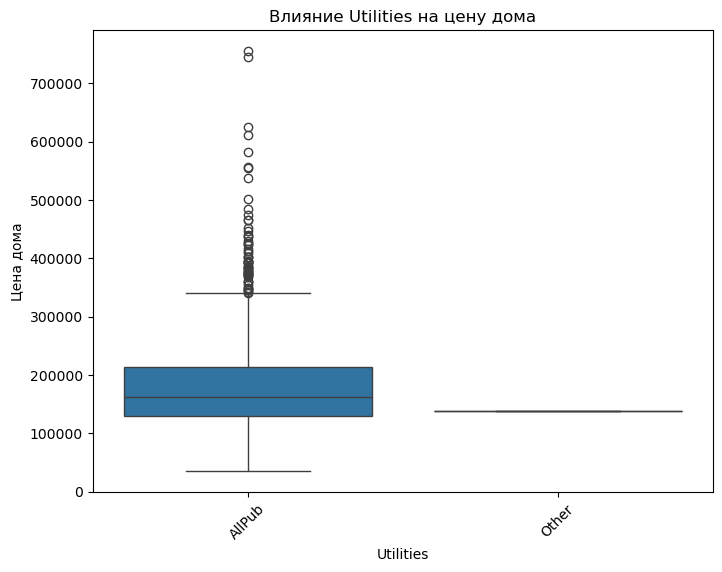

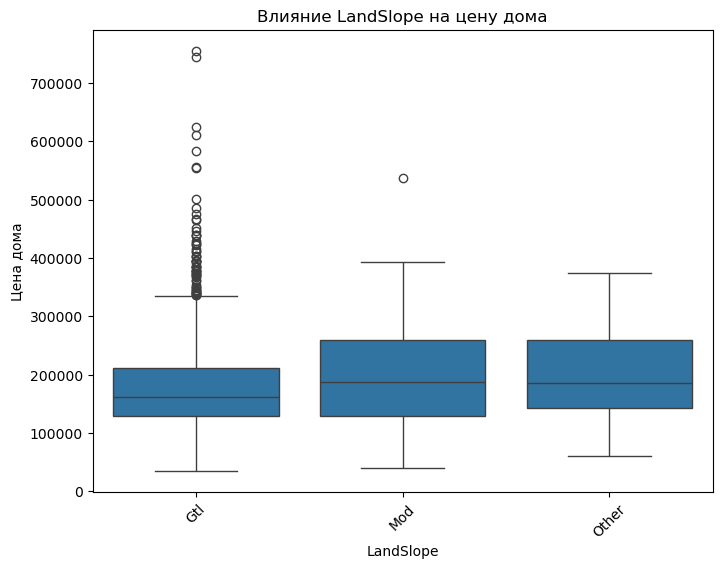

In [33]:
df['MSZoning'].unique()  # проверяем массив уникальных значений 

cat_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope']

# Построение boxplot для каждого столбца
for col in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'Влияние {col} на цену дома')
    plt.xticks(rotation=45)
    plt.ylabel('Цена дома')
    plt.show()

с

## Попробуем почистить выбросы у цифровых данных
*Для этого попробуем испольтзовать "Метод стандартного отклонения (STD)"*

In [35]:
# Функция для удаления выбросов с использованием стандартного отклонения
def remove_outliers_STD(df, numerical_columns):
    for col in numerical_columns:
        mean = df[col].mean()  # вычисляем среднее
        std = df[col].std()  # вычисляем стандартное отклонение
        threshold_upper = mean + 3 * std  # верхняя граница
        threshold_lower = mean - 3 * std  # нижняя граница
        df = df[(df[col] >= threshold_lower) & (df[col] <= threshold_upper)]  # удаляем выбросы
    return df

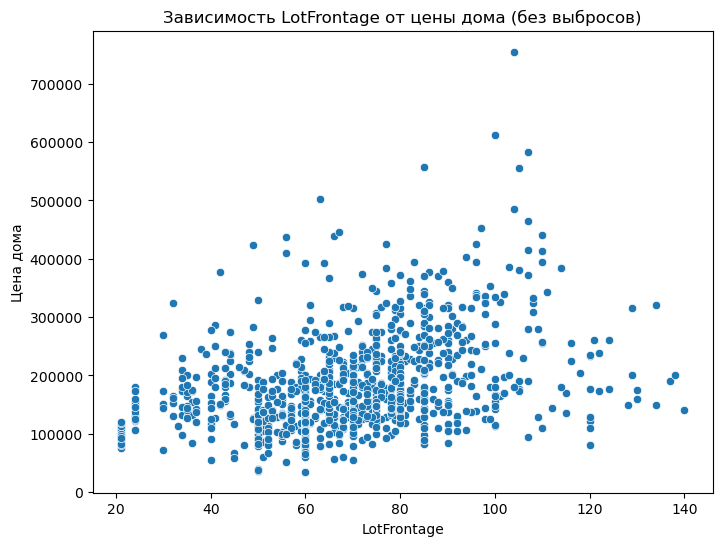

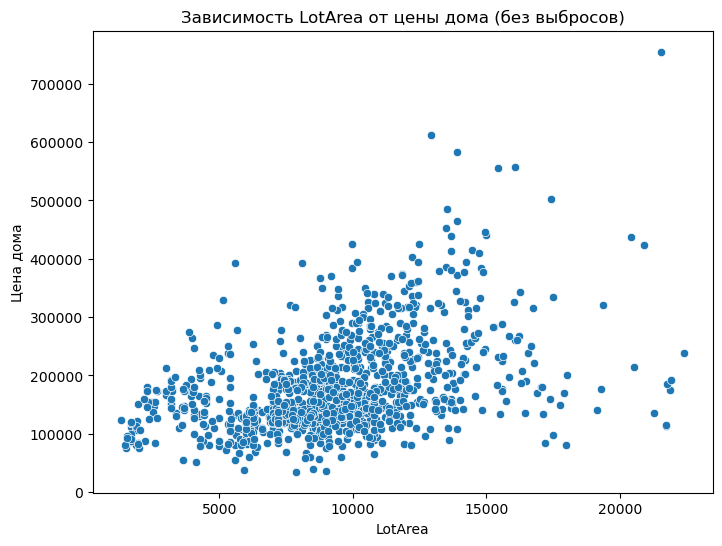

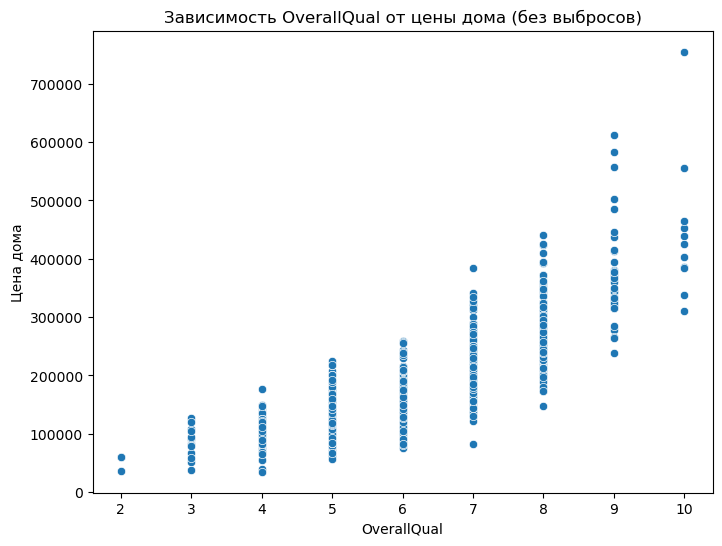

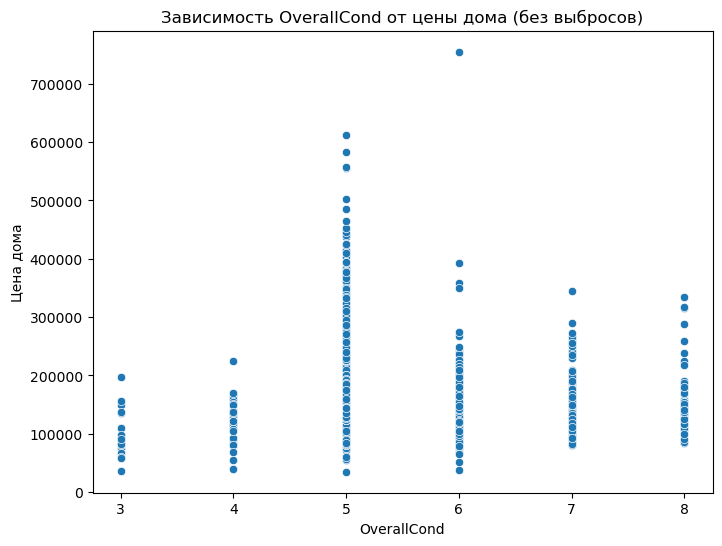

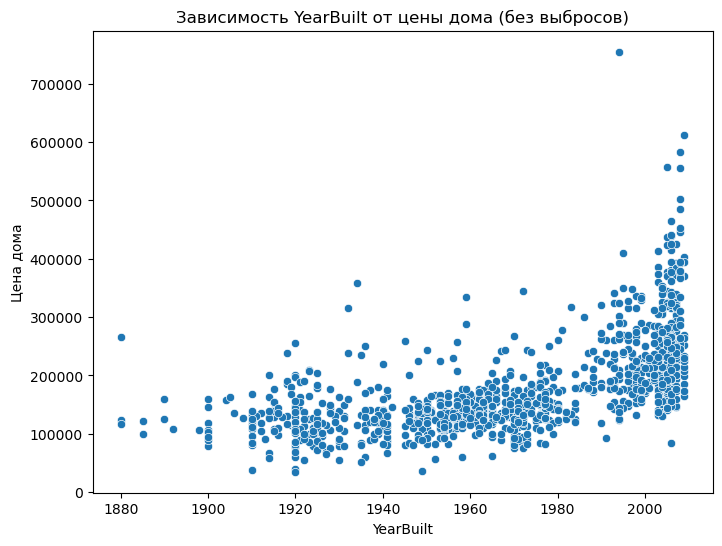

In [36]:
# Применим к числовым данным
numerical_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']
df = remove_outliers_STD(df, numerical_columns)

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'Зависимость {col} от цены дома (без выбросов)')
    plt.xlabel(col)
    plt.ylabel('Цена дома')
    plt.show()




*Опять таки стало чуточку чище*